## Loading Data and Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
advert= pd.read_csv('Advertising.csv')
advert.head()
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Removing Index Column

In [3]:
advert.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
advert.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [9]:
advert.drop(['Unnamed: 0'], axis=1, inplace=True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Exploratory Data Analysis

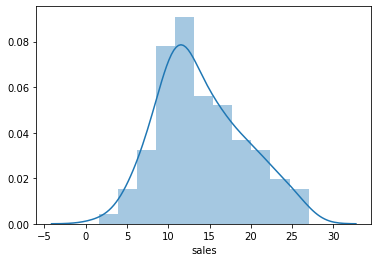

In [10]:
sns.distplot(advert.sales)

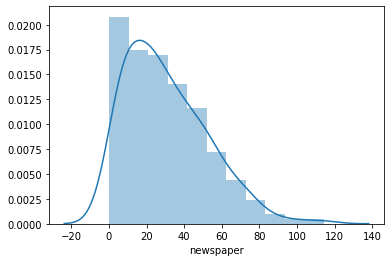

In [11]:
sns.distplot(advert.newspaper)

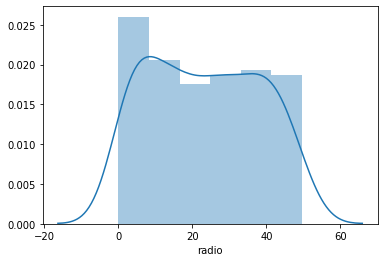

In [12]:
sns.distplot(advert.radio)

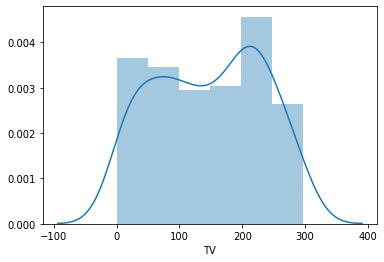

In [13]:
sns.distplot(advert.TV)

## Relationship Between Predictors and Responce

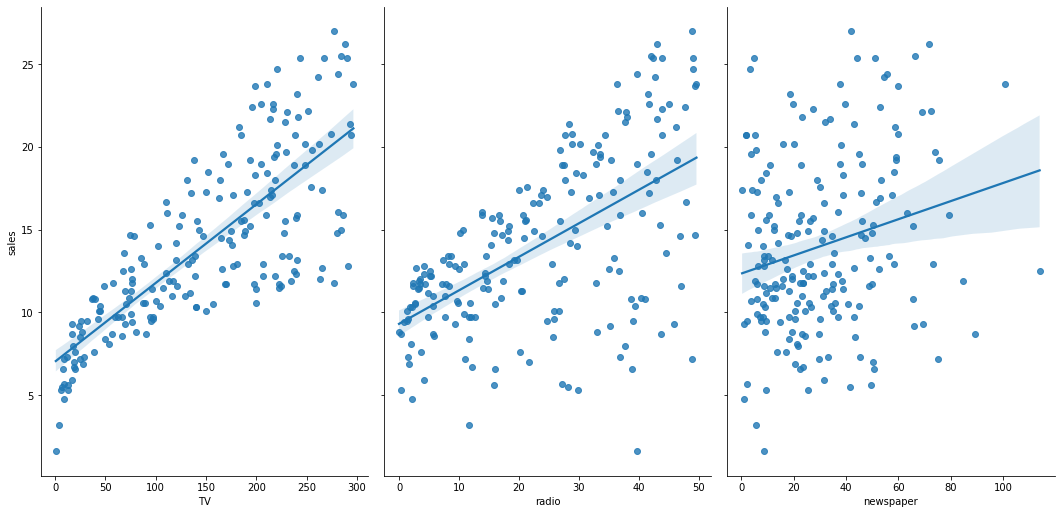

In [16]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg');

In [17]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [18]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


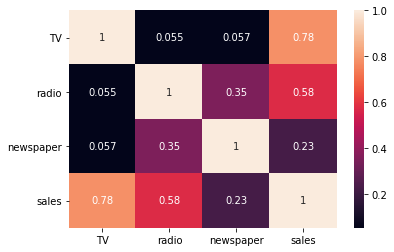

In [19]:
sns.heatmap(advert.corr(), annot=True)

## Creating  a Linear Regression Model

In [20]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:
y = advert.sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

## Intepreting Model Coefficient

In [25]:
print(linreg.intercept_)
print(linreg.coef_)
zip(advert.TV,linreg.coef_)

6.91197261886872
[0.04802945]


## Making Predictions With The Model

In [26]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

## Model Evaluation Metrics

In [27]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [28]:
print(metrics.mean_absolute_error(true, pred))

10.0


In [29]:
print(metrics.mean_squared_error(true, pred))

150.0


In [30]:
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


In [31]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542
